In [120]:
from deconv.imports import *
from sklearn.utils import resample
import numpy as np
from deconv.figures.common import subplotLabel, getSetup

In [53]:
A_antiD, _, glycan_list = load_tables()
adcc_3a, adcc_3b = load_figures()

In [125]:
num_iters = 100

glycans_3a = []
glycans_3b = []

for i in range(num_iters):
    new3a = resample(adcc_3a, n_samples=40, replace=True, stratify=adcc_3a.index)
    mean_3a = new3a.groupby(level=0).sum() / new3a.groupby(level=0).count()

    new3b = resample(adcc_3b, n_samples=40, replace=True, stratify=adcc_3b.index)
    mean_3b = new3b.groupby(level=0).sum() / new3b.groupby(level=0).count()

    glycans_3a.append(infer_x(A_antiD, mean_3a))
    glycans_3b.append(infer_x(A_antiD, mean_3b))


In [126]:
glycans3a = np.array(glycans_3a)
mean3a = np.mean(glycans3a, axis=0)
error3a = np.std(glycans3a, axis=0)

glycans3b = np.array(glycans_3b)
mean3b = np.mean(glycans3b, axis=0)
error3b = np.std(glycans3b, axis=0)

print(error3a, error3b)



[0.00238351 0.00266963 0.         0.         0.00305839 0.00547275
 0.00476919 0.00443947 0.00153966 0.0062351  0.02549    0.00540537
 0.01701822 0.07866221 0.06722814 0.04726235 0.18402255 0.30435253
 0.21589518 0.13379747 0.12521538 0.25562505 0.58012988 0.36897852] [2.27013660e-03 0.00000000e+00 0.00000000e+00 4.19826089e-04
 2.19030496e-02 8.48667369e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.64811305e-03 1.96459637e-02 0.00000000e+00
 1.86785530e-02 1.60260525e-01 9.17743002e-02 9.01629527e-02
 2.19612496e-01 3.36740355e-01 1.44168236e-01 1.66335546e-01
 9.58045451e-02 2.06490017e-01 8.63206258e-01 2.98469982e-01]


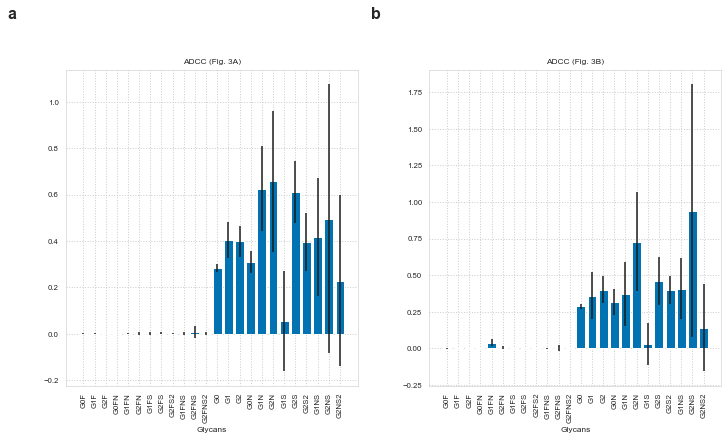

In [127]:
ax, f = getSetup((10, 6), (1, 2))
ax[0].bar(glycan_list, mean3a, yerr=error3a)
ax[0].set_title("ADCC (Fig. 3A)")
ax[0].set_xlabel("Glycans")
ax[0].set_xticklabels(glycan_list, rotation=90)

ax[1].bar(glycan_list, mean3b, yerr=error3b)
ax[1].set_title("ADCC (Fig. 3B)")
ax[1].set_xlabel("Glycans")
ax[1].set_xticklabels(glycan_list, rotation=90)

# Add subplot labels
subplotLabel(ax)